# Profit Maximization under Perfect Competition (updated)

In the first part of the simulation the (falling) market demand function P(Q) and the cost function of all firms are defined (all firms have the same cost structure). Interestingly, switching from increasing to decreasing marginal costs (be it linear or quadratic) does not change the qualitative outcome of the simulation.

The demand elasticity is defined by adjusting demand_slope (high (positive) value means a high demand elasticity, i.e. a big reaction of aggregated demand to price changes).

In the current situation, there are 10 firms competing in the market.

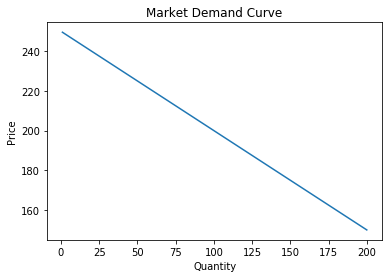

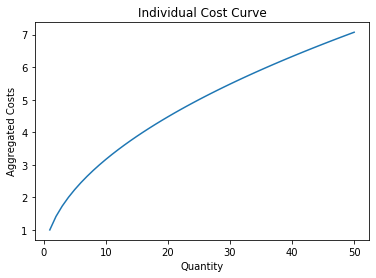

In [161]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

# Parameter
demand_max = 250
demand_slope = 0.5

n = 10  # Number of firms


def demand(Q):
    return demand_max - demand_slope * Q  # Aggregated demand function (Q = aggregated quantity)


def costs(q):
    return q ** 0.5  # Individual cost function for each firm (q = individual quantity)

Q_range = np.array(list(range(1, 201)))
q_range = np.array(list(range(1, 51)))
D_range = demand(Q_range)
c_range = costs(q_range)

plt.plot(Q_range, D_range)
plt.title('Market Demand Curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

plt.plot(q_range, c_range)
plt.title('Individual Cost Curve')
plt.xlabel('Quantity')
plt.ylabel('Aggregated Costs')
plt.show()

At the beginning, the output of each firm is chosen randomly between 1 and 5. The sum of all indiviual outputs gives the aggregated market supply with whom we can calculate the market price (by inserting the value into the demand function). 

Using the individual production of each firm, their revenue, costs and profit is calculated. The profits are aggregated in the variable cash. For further analysis, the program also tracks the exact development of quantity, profits, cash and investments of three singe firms (in order of adjustment the first, middle and last one).

The two graphs shows, how production and profits are distributed among the firms in the beginning (since the price is the same for alle firms, these distributions have to be the same by desing - if not, there is a mistake in the program).

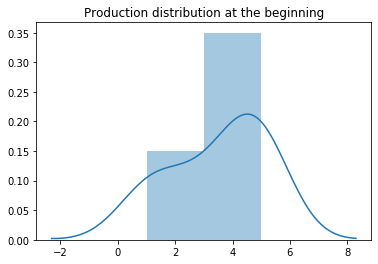

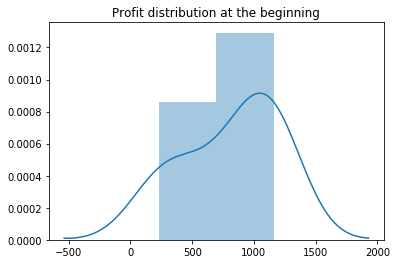

In [162]:
q_list = []
for _ in range(10):
    q_list.append(random.randint(1, 5))
q = np.array(q_list)

q_beginning = q
cash = np.array([0] * n)
cash = np.array([0] * n)

Q = sum(q)  # Aggregated Output
P = demand(Q)  # Market Price
prices = [P]

# Individual firms:
cos = costs(q)  # Costs
rev = P * q  # Revenue
profit = rev - cos

sns.distplot(q_beginning)
plt.title('Production distribution at the beginning')
plt.show()

sns.distplot(profit)
plt.title('Profit distribution at the beginning')
plt.show()

dev_firm1_q = [q[0]]
dev_firm1_profit = [profit[0]]
dev_firm1_cash = [0]
dev_firm1_cos = [cos[0]]
dev_firm1_rev = [rev[0]]

dev_firm5_q = [q[4]]
dev_firm5_profit = [profit[4]]
dev_firm5_cash = [4]
dev_firm5_cos = [cos[4]]
dev_firm5_rev = [rev[4]]

dev_firm10_q = [q[9]]
dev_firm10_profit = [profit[9]]
dev_firm10_cash = [9]
dev_firm10_cos = [cos[9]]
dev_firm10_rev = [rev[9]]

profit_beginning = profit
q_aggregated = [sum(q)]

Now the firms get to alter their production value. Starting with Firm 1, all firms test whether an increase or decrease of production has a positive effect on their profits (since a reduction of the (aggregated) supply leads to a higher market price, which could be benefitial) and set their new output accordingly. Additionally, the companies can use the saved money (cash) to invest, which means the firm can adjust their production by a higher quantity. However, the firm only does only use this additional leeway if it brings more net profit then the standard adjustment (let alone no variation). The scope of additional variation is dependent on the cash level and the price per investment item can be set by the user. To avoid immense investments after a long period of saving (which would be pretty unrealistic), there are currently only two various levels of investment.

The user can determine the number of rounds the firms get to make production decisions (1 round means 1 adjustment per firm = 10 decisions in total). As a detailed example, the program shows the decisions made by firm 1 in each round.

In [163]:
invest_cost = 5000

for counter in range(1, 26):
    for i in range(0, 10):
        if cash[i] > 10000:
            invest = 2
        elif cash[i] > 25000:
            invest = 5
        else:
            invest = 0
        q_test = q
        q_test[i] = q_test[i] + 2
        Q_test = sum(q_test)
        P_test = demand(Q_test)
        cos_test = costs(q_test)
        rev_test = P_test * q_test
        profit_test = rev_test - cos_test
        if profit_test[i] > profit[i]:
            q_test_2 = q_test
            q_test_2[i] = q_test_2[i] + 2 + invest
            Q_test_2 = sum(q_test_2)
            P_test_2 = demand(Q_test_2)
            cos_test_2 = costs(q_test_2)
            rev_test_2 = P_test_2 * q_test_2
            profit_test_2 = rev_test_2 - cos_test_2
            if (profit_test_2[i] - invest*invest_cost) <= profit_test[i]: # Entscheidung gegen Investment
                if i == 1:
                    print("Firma 1 erhöht q und investiert nicht in Runde " + str(counter))
                Q = Q_test_2
                P = P_test_2
                cos = cos_test_2
                rev = rev_test_2
                profit = profit_test_2
                cash_step = np.array([0] * n)
                cash_step[i] += profit[i]
                cash = cash + cash_step
                q = q_test_2
            else: # Entscheidung für Investment
                if i == 1:
                    print("Firma 1 erhöht q und investiert in Runde " + str(counter))
                Q = Q_test
                P = P_test
                cos = cos_test
                rev = rev_test
                cash[i] = cash[i] - invest*invest_cost
                profit = profit_test
                q = q_test
        else:
            q_test = q
            q_test[i] = q_test[i] - 2 
            Q_test = sum(q_test)
            P_test = demand(Q_test)
            cos_test = costs(q_test)
            rev_test = P_test * q_test
            profit_test = rev_test - cos_test
            if profit_test[i] > profit[i]:
                q_test_2 = q_test
                q_test_2[i] = q_test_2[i] - 2 - invest
                Q_test_2 = sum(q_test_2)
                P_test_2 = demand(Q_test_2)
                cos_test_2 = costs(q_test_2)
                rev_test_2 = P_test_2 * q_test_2
                profit_test_2 = rev_test_2 - cos_test_2
                if (profit_test_2[i] - invest*invest_cost) <= profit_test[i]:  # Entscheidung gegen Investment
                    if i == 1:
                        print("Firma 1 reduziert q und investiert nicht in Runde " + str(counter))
                    Q = Q_test_2
                    P = P_test_2
                    cos = cos_test_2
                    rev = rev_test_2
                    profit = profit_test_2
                    cash_step = np.array([0] * n)
                    cash_step[i] += profit[i]
                    cash = cash + cash_step
                    q = q_test_2
                else:  # Entscheidung für Investment
                    Q = Q_test
                    P = P_test
                    cos = cos_test
                    cash[i] = cash[i] - invest*invest_cost
                    rev = rev_test
                    profit = profit_test
                    q = q_test
                    if i == 1:
                        print("Firma 1 reduziert q investiert in Runde " + str(counter))
            else: 
                if i == 1:
                    print("Firma 1 macht gar nichts in Runde " + str(counter))
                cash[i] = cash[i] + profit[i]
                
        cos[cos < 0] = 0
        dev_firm1_q.append(q[0])
        dev_firm1_profit.append(profit[0])
        dev_firm1_cash.append(cash[0])
        dev_firm1_cos.append(cos[0])
        dev_firm1_rev.append(rev[0])
        dev_firm5_q.append(q[4])
        dev_firm5_profit.append(profit[4])
        dev_firm5_cash.append(cash[4])
        dev_firm5_cos.append(cos[4])
        dev_firm5_rev.append(rev[4])
        dev_firm10_q.append(q[9])
        dev_firm10_profit.append(profit[9])
        dev_firm10_cash.append(cash[9])
        dev_firm10_cos.append(cos[9])
        dev_firm10_rev.append(rev[9])
        q_aggregated.append(sum(q))
        prices.append(P)

    counter += 1

profit_end = profit

Firma 1 erhöht q und investiert in Runde 1
Firma 1 erhöht q und investiert in Runde 2
Firma 1 erhöht q und investiert in Runde 3
Firma 1 erhöht q und investiert in Runde 4
Firma 1 erhöht q und investiert in Runde 5
Firma 1 erhöht q und investiert in Runde 6
Firma 1 erhöht q und investiert in Runde 7
Firma 1 erhöht q und investiert in Runde 8
Firma 1 erhöht q und investiert in Runde 9
Firma 1 erhöht q und investiert in Runde 10
Firma 1 macht gar nichts in Runde 11
Firma 1 macht gar nichts in Runde 12
Firma 1 macht gar nichts in Runde 13
Firma 1 macht gar nichts in Runde 14
Firma 1 macht gar nichts in Runde 15
Firma 1 macht gar nichts in Runde 16
Firma 1 macht gar nichts in Runde 17
Firma 1 macht gar nichts in Runde 18
Firma 1 macht gar nichts in Runde 19
Firma 1 macht gar nichts in Runde 20
Firma 1 macht gar nichts in Runde 21
Firma 1 macht gar nichts in Runde 22
Firma 1 macht gar nichts in Runde 23
Firma 1 macht gar nichts in Runde 24
Firma 1 macht gar nichts in Runde 25


After all rounds have been simulated and all decisions have been made, the program shows the results:

1. The distribution of the firms' profits changes. It is possible, that all firms are better/worse off than in the beginning or that the picture is mixed. It is important to remember that profits are not aggregated here but instead used as investments. Hence, the distribution in the end is only a snapshot of the situation after the last round and can change after just one production adjustment by one of the firms.

2. As economic theory predicts, the competition among firms leads to falling prices which is good for consumers. By being isolated and egoistic, the firms tend to steadily increase the aggregated output until further increases would bring higher costs than profits because of the fallen prices. Therefore, their combined performance regarding profits is worse than it would have been, if they had acted as one monopoly without competing against each other. 

3. The behavior of the firms leads to an equilibrium in the end: Prices and output do not fluctuate anymore after a certain number of rounds, the levels reached are dependent on and stable for a certain set of parameters. The question of how this equilibrium can be mathematically determined will be next to be answered.

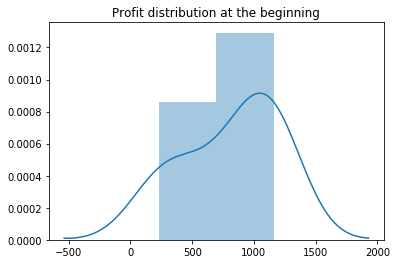

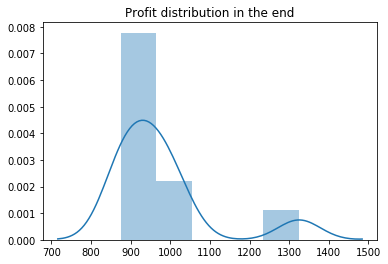

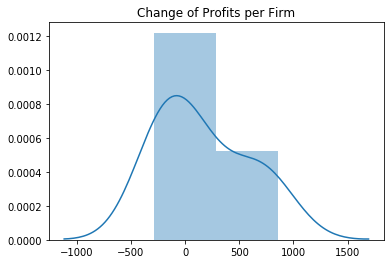

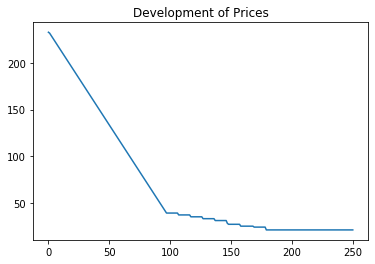

Gleichgewichtspreis: 21.5


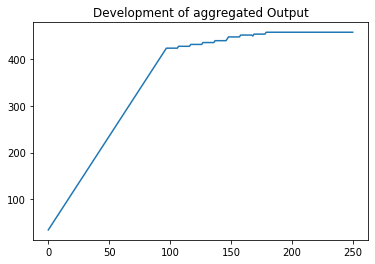

Gleichgewichtsmenge: 457


In [164]:
sns.distplot(profit_beginning)
plt.title('Profit distribution at the beginning')
plt.show()

sns.distplot(profit_end)
plt.title('Profit distribution in the end')
plt.show()

profit_dev = profit_end - profit_beginning

sns.distplot(profit_dev)
plt.title('Change of Profits per Firm')
plt.show()

plt.plot(prices)
plt.title('Development of Prices')
plt.show()
print("Gleichgewichtspreis: " + str(prices[-1]))

plt.plot(q_aggregated)
plt.title('Development of aggregated Output')
plt.show()
print("Gleichgewichtsmenge: " + str(q_aggregated[-1]))

Analyzing the behavior and the success of firms in finding the ideal, i.e. profit maximizing, production volume, it is evident that the first firm to set a new quantity has an advantage over the following. Additionally, a higher quantity at the beginning is also an advantage that can compensate for a late decision-making. The cash-reserves diagram has to be interpreted in the following way: When the firm makes a decision (remember, this occurs every 10 simulation steps) and the cash reserves rise, then it had decided to not invest the money saved from previous rounds.

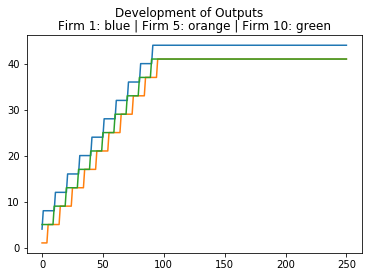

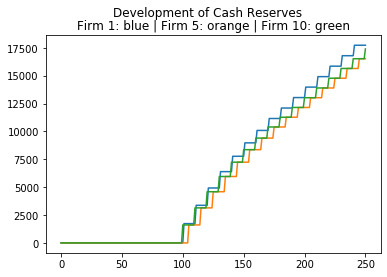

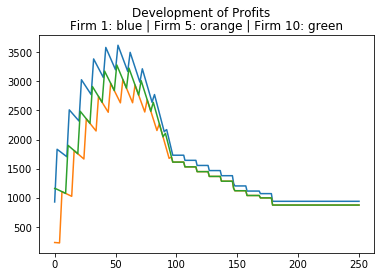

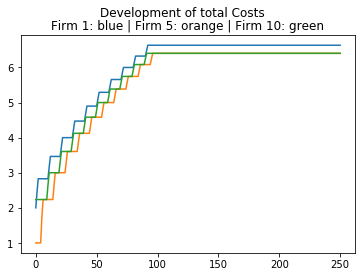

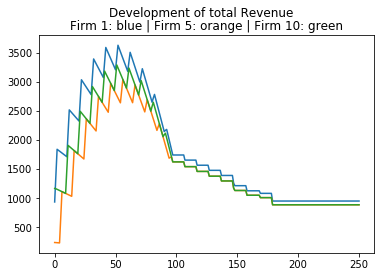

In [165]:
plt.plot(dev_firm1_q)
plt.plot(dev_firm5_q)
plt.plot(dev_firm10_q)
plt.suptitle('Development of Outputs')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_cash)
plt.plot(dev_firm5_cash)
plt.plot(dev_firm10_cash)
plt.suptitle('Development of Cash Reserves')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_profit)
plt.plot(dev_firm5_profit)
plt.plot(dev_firm10_profit)
plt.suptitle('Development of Profits')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_cos)
plt.plot(dev_firm5_cos)
plt.plot(dev_firm10_cos)
plt.suptitle('Development of total Costs')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()

plt.plot(dev_firm1_rev)
plt.plot(dev_firm5_rev)
plt.plot(dev_firm10_rev)
plt.suptitle('Development of total Revenue')
plt.title('Firm 1: blue | Firm 5: orange | Firm 10: green')
plt.show()